In [2]:
!pip install statsmodels


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import statsmodels.api as sm

sm.stats.Table2x2(list(reversed([[339, 13260], [170, 11531]]))).summary()

,Estimate,SE,LCB,UCB,p-value
Odds ratio,0.577,,0.479,0.694,0.000
Log odds ratio,-0.550,0.095,-0.736,-0.365,0.000
Risk ratio,0.583,,0.486,0.700,0.000
Log risk ratio,-0.540,0.093,-0.722,-0.357,0.000


In [4]:
s = """Semenza et al., 1998 (26) 0 88 2 78
Reller et al., 2003 (27) 10 729 5 182
Crump et al., 2005 (21) 9 1009 15 505
Luby et al., 2006 (19) 2 1013 0 553
Chiller et al., 2006 (28) 0 132 1 137
Kremer et. al., 2011 (29) 18 691 47 1465
Peletz et al., 2012 (22) 3 58 6 54
Boisson et al., 2013 (30) 2 1505 1 1507
Null et al., 2018 (18) 30 858 114 2697
Luby et al., 2018 (20) 27 629 62 1244
Humphrey et al., 2019 (31) 49 946 50 909
Kirby et al., 2019 (32) 8 1198 12 1252
Haushofer et al. 2021 (33) 7 987 22 965
Dupas et al. 2021 (34) 5 1288 2 1321
Quick et al. 1999 (35) 0 400 0 391
"""

In [5]:
for row in s.split('\n')[:-1]:
    # paper_name is all the text up to and including the first ')'
    paper_name = row[:row.find(')')+1]
    treatment_event, treatment_non_event, control_event, control_non_event = [int(x) for x in row[row.find(')')+1:].split()]
    print(paper_name, treatment_event, treatment_non_event, control_event, control_non_event)

Semenza et al., 1998 (26) 0 88 2 78
Reller et al., 2003 (27) 10 729 5 182
Crump et al., 2005 (21) 9 1009 15 505
Luby et al., 2006 (19) 2 1013 0 553
Chiller et al., 2006 (28) 0 132 1 137
Kremer et. al., 2011 (29) 18 691 47 1465
Peletz et al., 2012 (22) 3 58 6 54
Boisson et al., 2013 (30) 2 1505 1 1507
Null et al., 2018 (18) 30 858 114 2697
Luby et al., 2018 (20) 27 629 62 1244
Humphrey et al., 2019 (31) 49 946 50 909
Kirby et al., 2019 (32) 8 1198 12 1252
Haushofer et al. 2021 (33) 7 987 22 965
Dupas et al. 2021 (34) 5 1288 2 1321
Quick et al. 1999 (35) 0 400 0 391


In [6]:
import numpy as np

In [7]:
import pandas as pd
list_of_rows = []
for row in s.split('\n')[:-1]:
    # paper_name is all the text up to and including the first ')'
    paper_name = row[:row.find(')')+1]
    treatment_event, treatment_non_event, control_event, control_non_event = [int(x) for x in row[row.find(')')+1:].split()]
    list_of_rows.append([paper_name, treatment_event, treatment_non_event, control_event, control_non_event])

df = pd.DataFrame(list_of_rows, columns=['paper_name', 'treatment_event', 'treatment_non_event', 'control_event', 'control_non_event'])

In [8]:
df.head()

,paper_name,treatment_event,treatment_non_event,control_event,control_non_event
0,"Semenza et al., 1998 (26)",0,88,2,78
1,"Reller et al., 2003 (27)",10,729,5,182
2,"Crump et al., 2005 (21)",9,1009,15,505
3,"Luby et al., 2006 (19)",2,1013,0,553
4,"Chiller et al., 2006 (28)",0,132,1,137


In [9]:
# sum total events and non-events
df.sum()

paper_name             Semenza et al., 1998 (26)Reller et al., 2003 (...
treatment_event                                                      170
treatment_non_event                                                11531
control_event                                                        339
control_non_event                                                  13260
dtype: object

- why can we assume that $a+b$ is constant under the null hypothesis? (similarly, for each row/column)
    - (this is needed for the calculation afaict, but maybe I'm wrong)
- how exactly does the finite population adjustment fits in?
- not sure why we take the log after computing the Mantel&Haenszel. 
    - actually, I only understand M&H..
- How do they use it in the paper, and what exactly happens in the random effects model



I'll try and implement it directly

In [36]:
df['odds_ratio'] = (df['treatment_event'] / df['treatment_non_event']) / (df['control_event'] / df['control_non_event'])

In [13]:
df.head()

,paper_name,treatment_event,treatment_non_event,control_event,control_non_event,odds_ratio
7,"Boisson et al., 2013 (30)",2,1505,1,1507,2.002658
4,"Chiller et al., 2006 (28)",0,132,1,137,0.000000
2,"Crump et al., 2005 (21)",9,1009,15,505,0.300297
13,Dupas et al. 2021 (34),5,1288,2,1321,2.564053
12,Haushofer et al. 2021 (33),7,987,22,965,0.311090


In [12]:
# sort df alphabetically by paper_name
df = df.sort_values(by='paper_name')

In [14]:
df

,paper_name,treatment_event,treatment_non_event,control_event,control_non_event,odds_ratio
7,"Boisson et al., 2013 (30)",2,1505,1,1507,2.002658
4,"Chiller et al., 2006 (28)",0,132,1,137,0.000000
2,"Crump et al., 2005 (21)",9,1009,15,505,0.300297
13,Dupas et al. 2021 (34),5,1288,2,1321,2.564053
12,Haushofer et al. 2021 (33),7,987,22,965,0.311090
10,"Humphrey et al., 2019 (31)",49,946,50,909,0.941670
11,"Kirby et al., 2019 (32)",8,1198,12,1252,0.696717
5,"Kremer et. al., 2011 (29)",18,691,47,1465,0.811959
3,"Luby et al., 2006 (19)",2,1013,0,553,inf
9,"Luby et al., 2018 (20)",27,629,62,1244,0.861275


In [21]:
def peto_odds_single_study(a, b, c, d):
    if a == 0 and c == 0:
        # increase all counts by 0.5
        a += 0.5
        b += 0.5
        c += 0.5
        d += 0.5
    O = a
    n = a + b + c + d
    E = (a + b) * (a + c) / n
    V = (a + b) * (a + c) * (c + d) * (b + d) / (n ** 2 * (n - 1))
    return np.exp((O - E) / V)


In [22]:
df['peto_odds_ratio'] = df.apply(lambda row: peto_odds_single_study(row['treatment_event'], row['treatment_non_event'], row['control_event'], row['control_non_event']), axis=1)

In [23]:
df

,paper_name,treatment_event,treatment_non_event,control_event,control_non_event,odds_ratio,peto_odds_ratio
7,"Boisson et al., 2013 (30)",2,1505,1,1507,2.002658,1.949890
4,"Chiller et al., 2006 (28)",0,132,1,137,0.000000,0.382935
2,"Crump et al., 2005 (21)",9,1009,15,505,0.300297,0.272128
13,Dupas et al. 2021 (34),5,1288,2,1321,2.564053,2.416254
12,Haushofer et al. 2021 (33),7,987,22,965,0.311090,0.347669
10,"Humphrey et al., 2019 (31)",49,946,50,909,0.941670,0.941686
11,"Kirby et al., 2019 (32)",8,1198,12,1252,0.696717,0.700493
5,"Kremer et. al., 2011 (29)",18,691,47,1465,0.811959,0.818376
3,"Luby et al., 2006 (19)",2,1013,0,553,inf,2.262449
9,"Luby et al., 2018 (20)",27,629,62,1244,0.861275,0.864377


In [29]:

def peto_approx(pt, pc):
    return np.exp(4 * (pt - pc) / ((pt + pc) * (1 - pt - pc)))
def odds(pt, pc):
    return pt / (1 - pt) / (pc / (1 - pc))

# compare peto approx to odds ratio on a grid of values
for pt in np.linspace(0.001, 0.01, 5):
    for pc in np.linspace(0.001, 0.01, 5):
        # print the values of pt, pc, peto_approx, and odds ratio, separated by commas, exactly 4 digits each
        print(f'{pt:.4f}, {pc:.4f}, {peto_approx(pt, pc):.4f}, {odds(pt, pc):.4f}')        

0.0010,0.0010,1.0000,1.0000
0.0010,0.0033,0.1192,0.3070
0.0010,0.0055,0.0616,0.1810
0.0010,0.0078,0.0445,0.1282
0.0010,0.0100,0.0365,0.0991
0.0033,0.0010,8.3870,3.2573
0.0033,0.0033,1.0000,1.0000
0.0033,0.0055,0.3543,0.5896
0.0033,0.0078,0.1912,0.4175
0.0033,0.0100,0.1268,0.3228
0.0055,0.0010,16.2379,5.5249
0.0055,0.0033,2.8226,1.6961
0.0055,0.0055,1.0000,1.0000
0.0055,0.0078,0.5024,0.7081
0.0055,0.0100,0.3074,0.5475
0.0078,0.0010,22.4873,7.8027
0.0078,0.0033,5.2308,2.3954
0.0078,0.0055,1.9905,1.4123
0.0078,0.0078,1.0000,1.0000
0.0078,0.0100,0.5968,0.7732
0.0100,0.0010,27.3612,10.0909
0.0100,0.0033,7.8861,3.0979
0.0100,0.0055,3.2530,1.8264
0.0100,0.0078,1.6757,1.2933
0.0100,0.0100,1.0000,1.0000


I'm not sure that Peto odds makes sense. I've looked at [this paper](https://onlinelibrary.wiley.com/doi/epdf/10.1002/bimj.201600034), and indeed it is behaving weird (although I'm not sure yet about the bottom line). 

The computation above compares the real OR with Peto OR in some cases, using an approximation for the expected peto OR in the limit $n\to\infty$ and assuming that both treatment and control arms have the exact same number of participants. Skewing the arm sizes further would bias Peto OR further.

That said, the ordinary OR estimator (just taking the observed odds ratio) is also biased. To see this, consider estimating $\frac{1}{p}$ from observing $n$ i.i.d Ber($p$) results. We expect the number of events, $e$, to be $pn$, but the expected value of $\frac{n}{e}$ isn't $\frac{1}{p}$.

We can maybe try and use bootstrap to do that without bias. 

In [61]:
# approximate the odds ratio using bootsrap
def bootstrap_odds_ratio(treatment_event, treatment_non_event, control_event, control_non_event, n_samples=10000):
    if treatment_event == 0 and control_event == 0:
        return np.nan, np.nan, np.nan
    treatment = np.concatenate([np.ones(treatment_event), np.zeros(treatment_non_event)])
    control = np.concatenate([np.ones(control_event), np.zeros(control_non_event)])
    odds_ratios = []
    for i in range(n_samples):
        treatment_sample = np.random.choice(treatment, size=len(treatment), replace=True)
        control_sample = np.random.choice(control, size=len(control), replace=True)
        if np.sum(control_sample) == 0:
            if np.sum(treatment_sample) == 0:
                odds_ratios.append(np.nan)
            odds_ratios.append(np.inf)
        else:
            odds_ratios.append(np.sum(treatment_sample) / (len(treatment_sample) - np.sum(treatment_sample)) / (np.sum(control_sample) / (len(control_sample) - np.sum(control_sample))))
    # if the number of nan values is less than 1% of the total number of samples, drop them
    if np.sum(np.isnan(odds_ratios)) < 0.01 * len(odds_ratios):
        odds_ratios = [x for x in odds_ratios if not np.isnan(x)]
    return np.mean(odds_ratios), np.percentile(odds_ratios, 2.5), np.percentile(odds_ratios, 97.5)


In [62]:
# add columns for the odds ratio and 95% confidence interval
df['bs_odds_ratio'], df['bs_odds_ratio_lower'], df['bs_odds_ratio_upper'] = zip(*df.apply(lambda row: bootstrap_odds_ratio(row['treatment_event'], row['treatment_non_event'], row['control_event'], row['control_non_event']), axis=1))

c:\Users\edoar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [63]:
df

,paper_name,treatment_event,treatment_non_event,control_event,control_non_event,odds_ratio,peto_odds_ratio,bs_odds_ratio,bs_odds_ratio_lower,bs_odds_ratio_upper
7,"Boisson et al., 2013 (30)",2,1505,1,1507,2.002658,1.949890,NaN,NaN,NaN
4,"Chiller et al., 2006 (28)",0,132,1,137,0.000000,0.382935,NaN,NaN,NaN
2,"Crump et al., 2005 (21)",9,1009,15,505,0.300297,0.272128,0.320440,0.110015,0.678548
13,Dupas et al. 2021 (34),5,1288,2,1321,2.564053,2.416254,inf,0.510844,NaN
12,Haushofer et al. 2021 (33),7,987,22,965,0.311090,0.347669,0.328388,0.100003,0.684604
10,"Humphrey et al., 2019 (31)",49,946,50,909,0.941670,0.941686,0.965756,0.628333,1.422145
11,"Kirby et al., 2019 (32)",8,1198,12,1252,0.696717,0.700493,0.771079,0.235031,1.804738
5,"Kremer et. al., 2011 (29)",18,691,47,1465,0.811959,0.818376,0.832568,0.433827,1.359050
3,"Luby et al., 2006 (19)",2,1013,0,553,inf,2.262449,NaN,NaN,NaN
9,"Luby et al., 2018 (20)",27,629,62,1244,0.861275,0.864377,0.871704,0.511207,1.335961


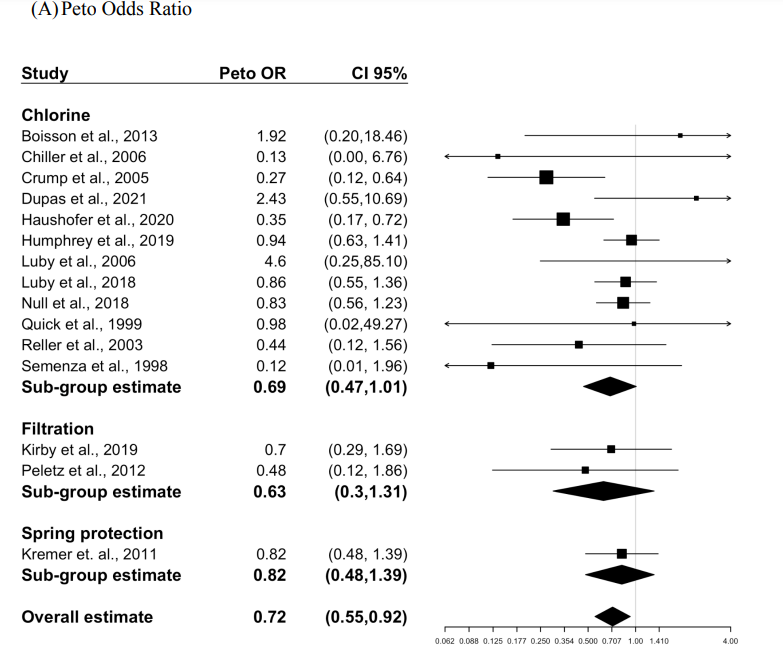

Overall, these odds ratios and their confidence intervals aren't that far away from my bootstrap computation.

Next, I'd like to calculate the Peto OR CIs with both bootstrap and under assumption of (log?)normality